# import libraties

In [44]:
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import fcluster
from sklearn.metrics import silhouette_score

import numpy as np
import matplotlib.pyplot as plt

# create and preprocess dataset

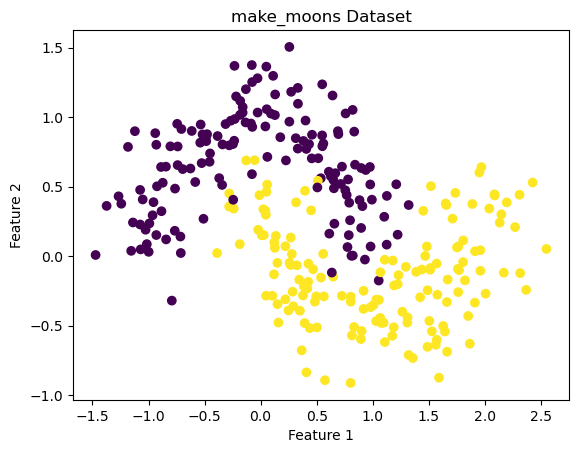

In [45]:
X, y = make_moons(n_samples=300, noise=0.2, random_state=42)

# Visualize
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("make_moons Dataset")
plt.show()

why I chose StandardardScaler:

* Ensures all features contribute equally to distance calculations
* Preserves relative structure of the data
* Works well with Euclidean, Manhattan, and Ward linkage
* Makes DBSCAN parameters (eps, min_samples) interpretable across dimensions

In [46]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train dbscan

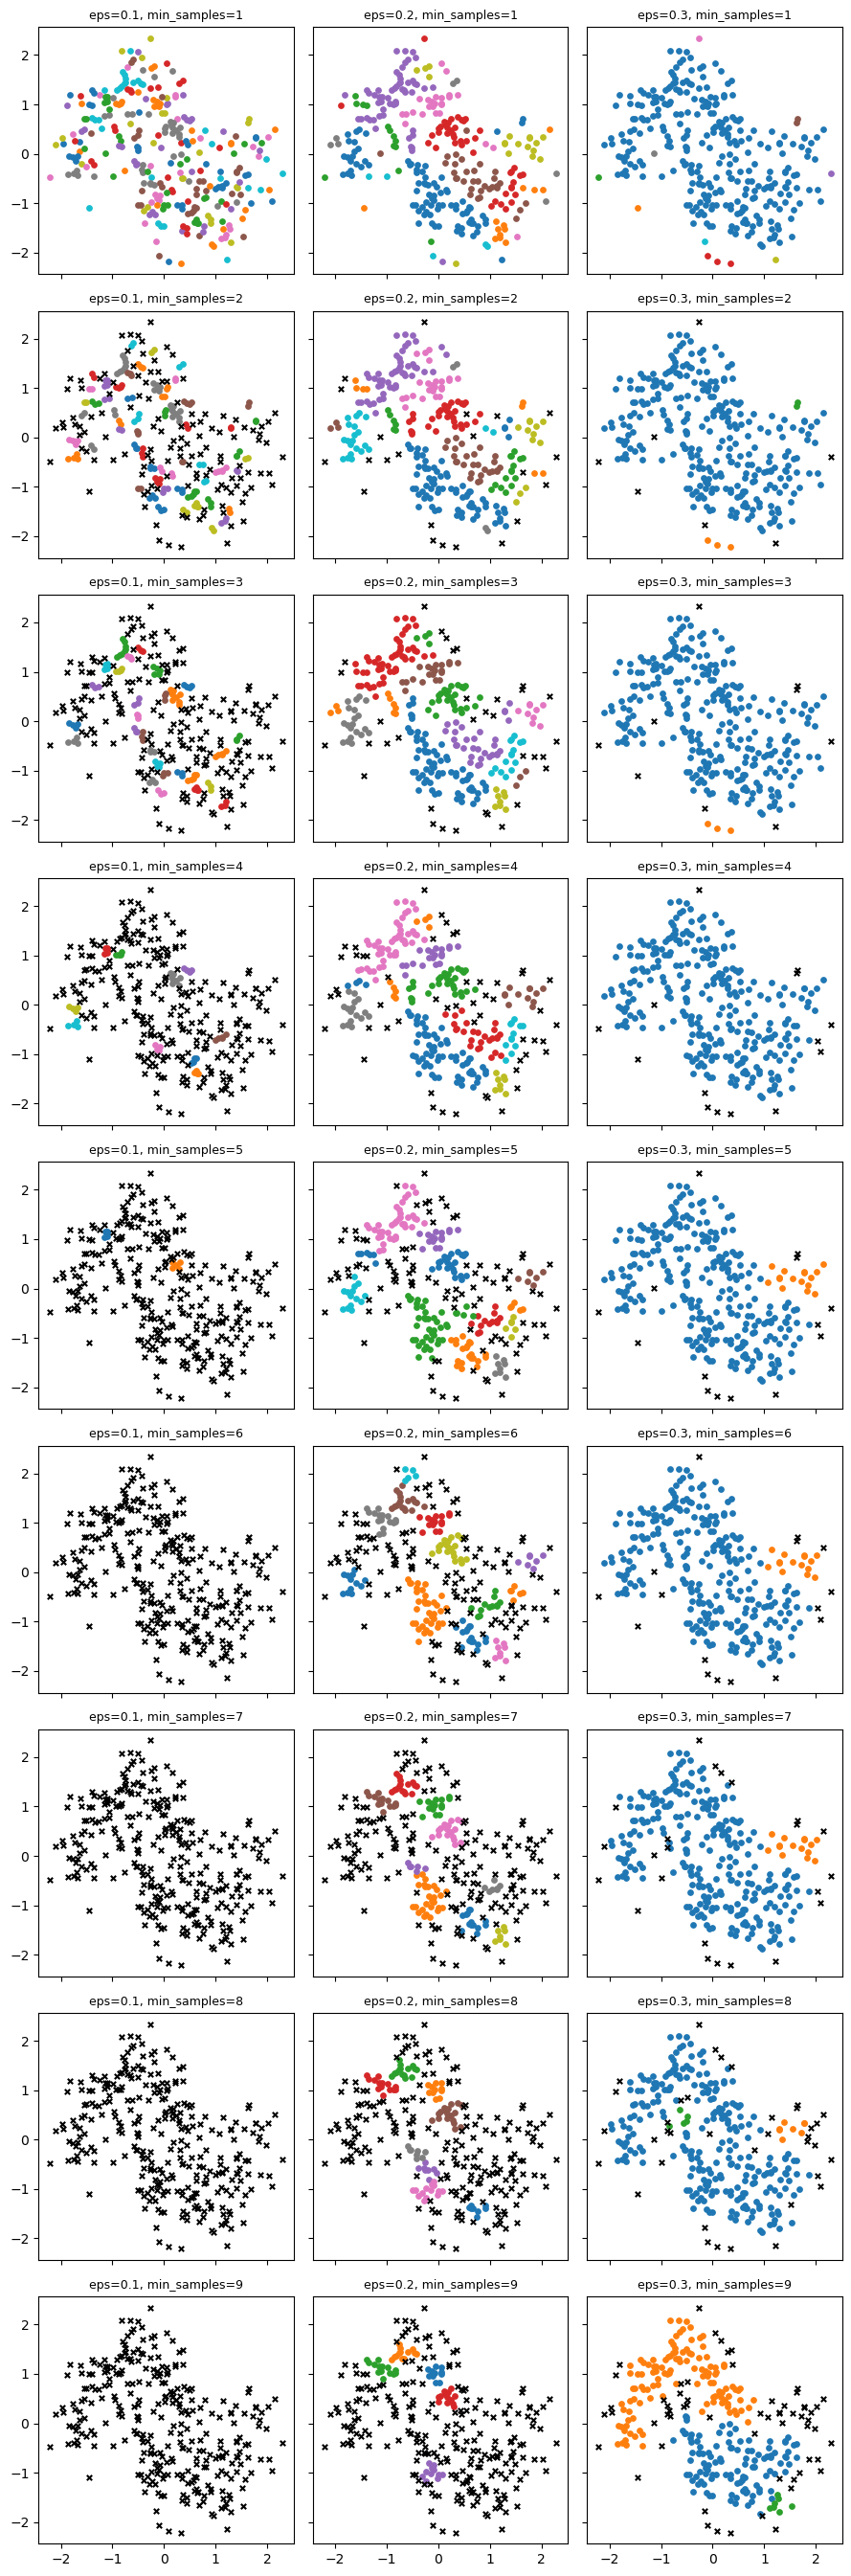

In [58]:
min_samples_list = list(range(1, 10))          # 4 rows
eps_list = [i / 10 for i in range(1, 4)]     # 10 columns

fig, axes = plt.subplots(
    nrows=len(min_samples_list),
    ncols=len(eps_list),
    figsize=(3 * len(eps_list), 3 * len(min_samples_list)),
    sharex=True,
    sharey=True
)

for i, min_samples in enumerate(min_samples_list):
    for j, eps in enumerate(eps_list):
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(X_scaled)

        ax = axes[i, j]

        for label in set(labels):
            mask = labels == label

            if label == -1:
                ax.scatter(
                    X_scaled[mask, 0],
                    X_scaled[mask, 1],
                    c="black",
                    marker="x",
                    s=15
                )
            else:
                ax.scatter(
                    X_scaled[mask, 0],
                    X_scaled[mask, 1],
                    s=15
                )

        ax.set_title(f"eps={eps}, min_samples={min_samples}", fontsize=9)

plt.tight_layout()
plt.show()

In [32]:
dbscan = DBSCAN(eps=0.3, min_samples=5)
labels = dbscan.fit_predict(X_scaled)

silhouette_score(X, labels)

np.float64(0.15648011303708184)

# train AgglomerativeClustering

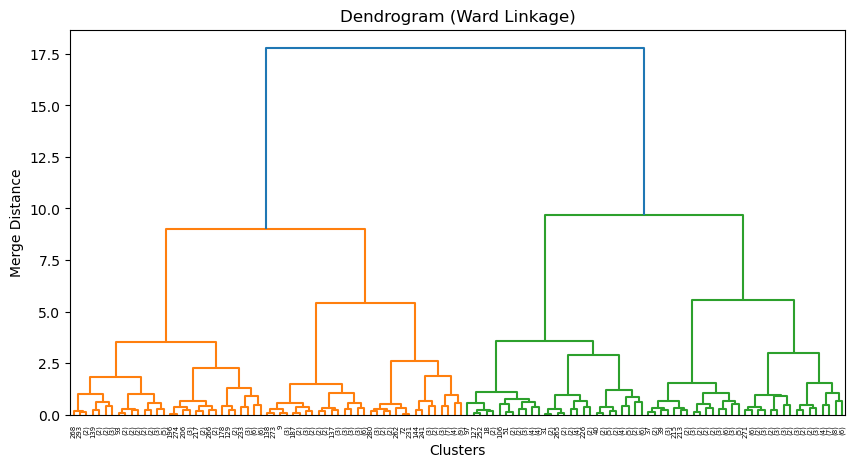

In [61]:
Z = linkage(X, method='ward')

plt.figure(figsize=(10, 5))
dendrogram(Z, truncate_mode='level', p=6)
plt.title("Dendrogram (Ward Linkage)")
plt.xlabel("Clusters")
plt.ylabel("Merge Distance")
plt.show()


In [62]:
cutoffs = [2.5, 5.0, 8.0, 10]  # distances chosen from dendrogram
clusterings = {}

for c in cutoffs:
    labels = fcluster(Z, t=c, criterion='distance')
    clusterings[c] = labels

In [63]:
for c, labels in clusterings.items():
    n_clusters = len(np.unique(labels))
    score = silhouette_score(X, labels)
    print(f"Cutoff = {c:.1f} | Clusters = {n_clusters} | Silhouette = {score:.3f}")

Cutoff = 2.5 | Clusters = 11 | Silhouette = 0.348
Cutoff = 5.0 | Clusters = 6 | Silhouette = 0.351
Cutoff = 8.0 | Clusters = 4 | Silhouette = 0.363
Cutoff = 10.0 | Clusters = 2 | Silhouette = 0.395


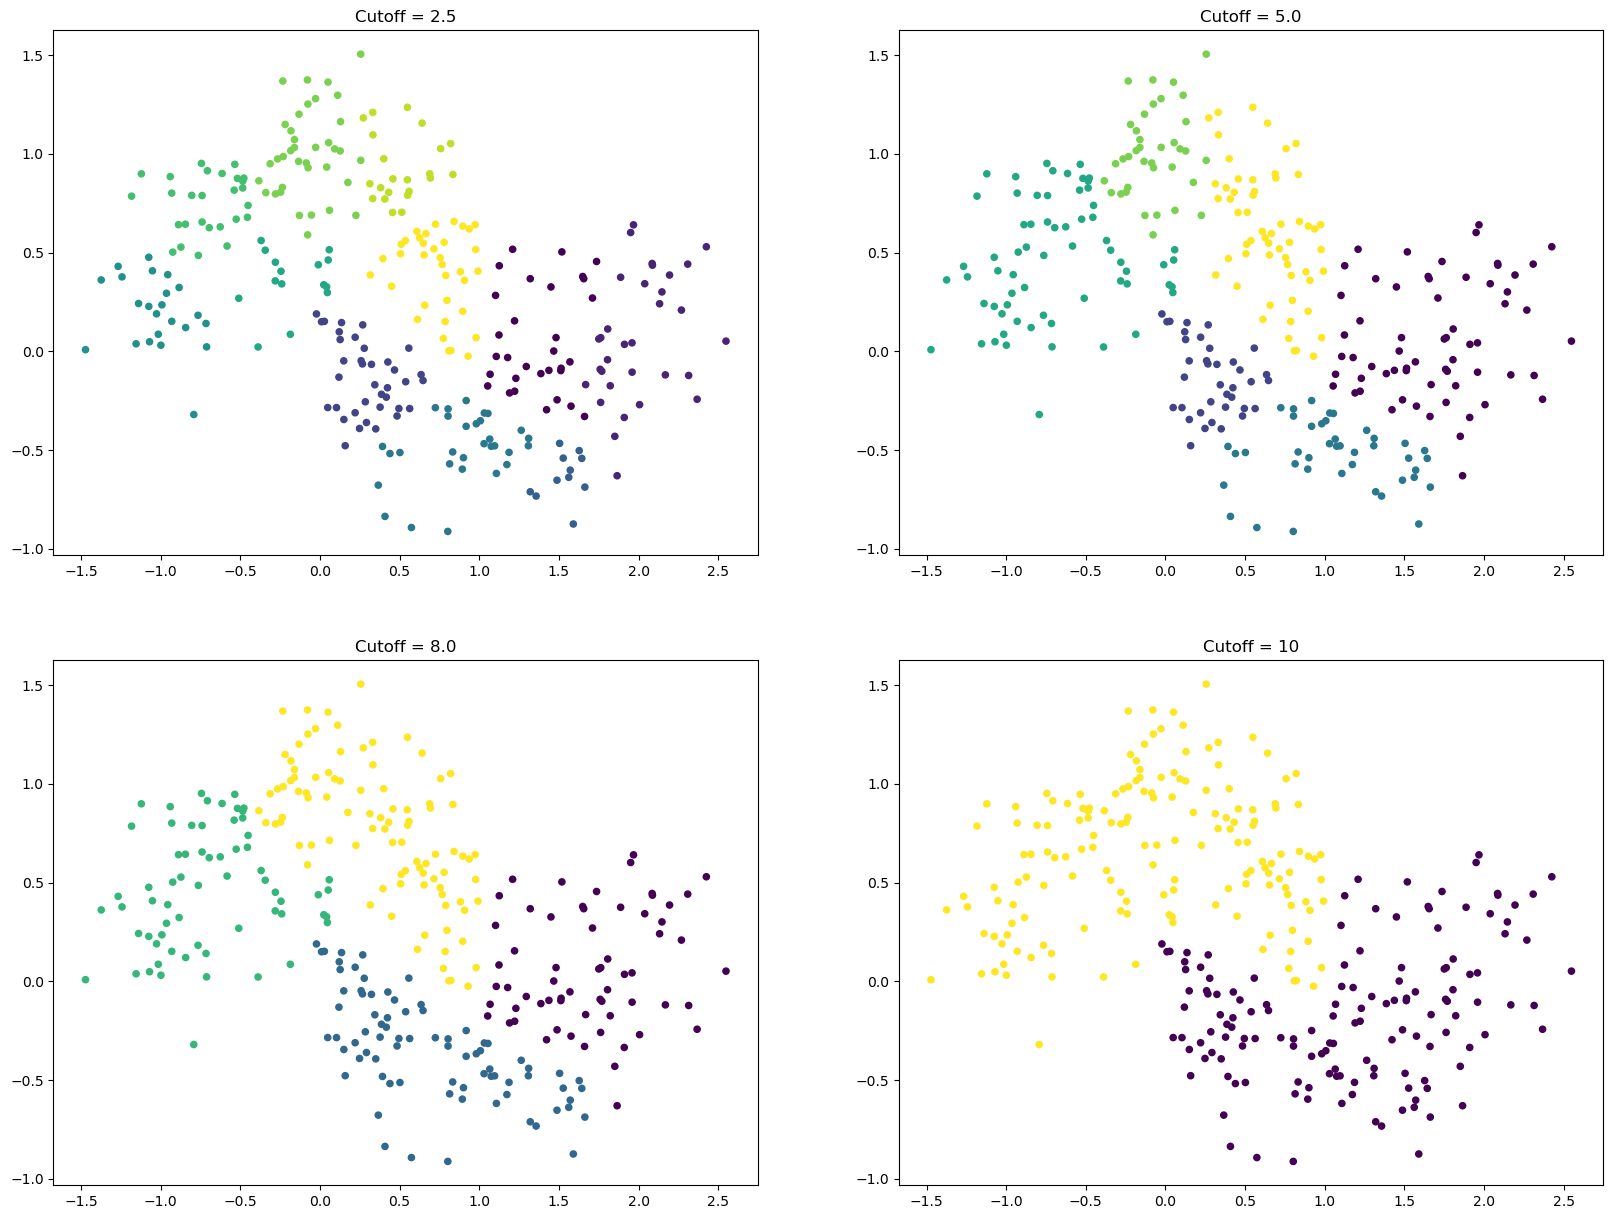

In [64]:
plt.figure(figsize=(20, 15))

for i, (c, labels) in enumerate(clusterings.items(), 1):
    plt.subplot(2, 2, i)
    plt.scatter(X[:, 0], X[:, 1], c=labels, s=20, cmap='viridis')
    plt.title(f"Cutoff = {c}")
    
plt.show()


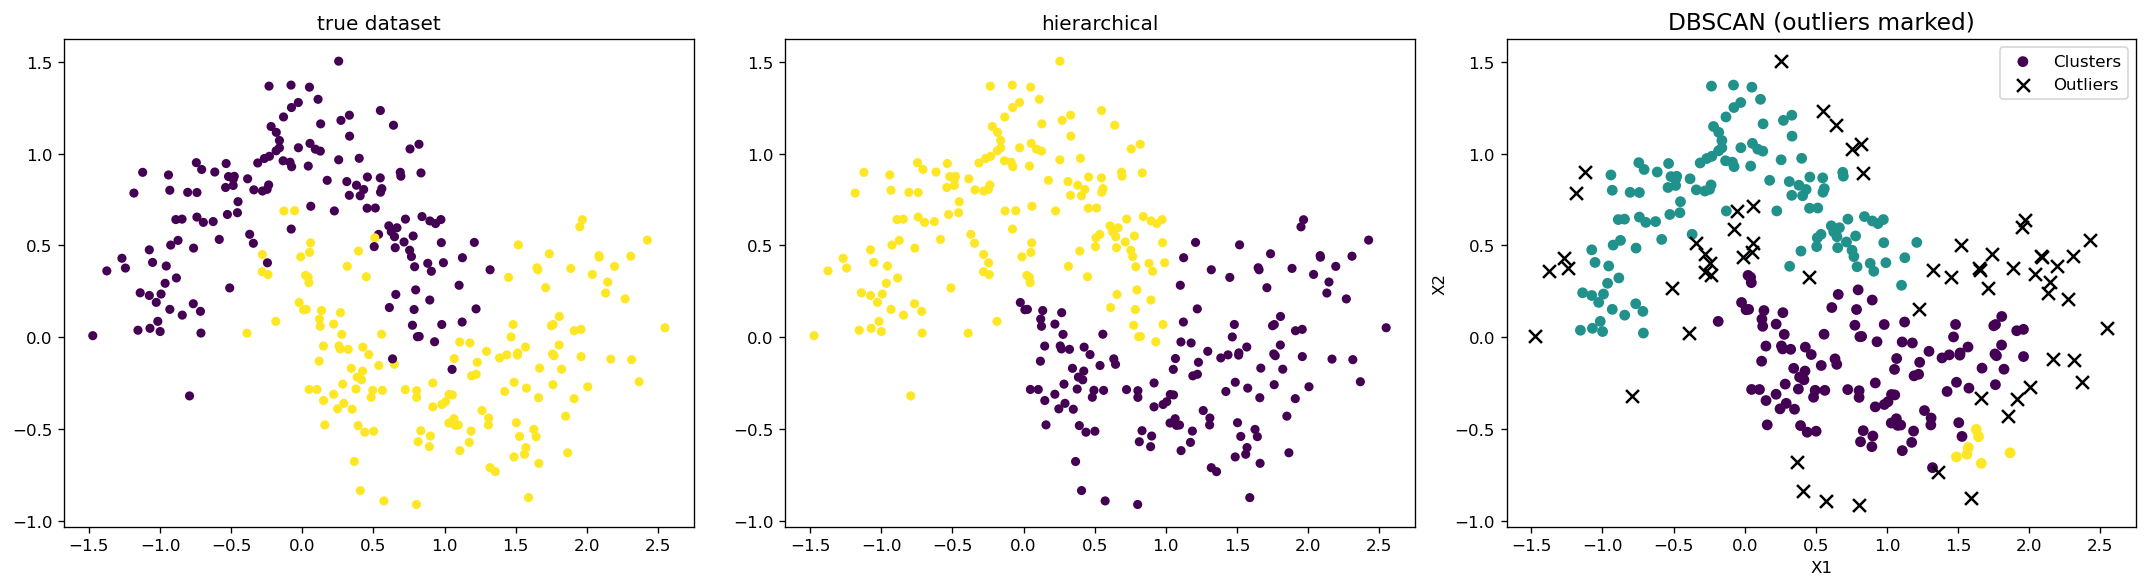

In [71]:
plt.figure(figsize=(18, 5), dpi=120)
plt.subplot(1, 3, 1)
plt.scatter(X[:, 0], X[:, 1], c=y, s=20, cmap='viridis')
plt.title("true dataset")
h_labels = fcluster(Z, t=10, criterion='distance')
plt.subplot(1, 3, 2)
plt.scatter(X[:, 0], X[:, 1], c=h_labels, s=20, cmap='viridis')
plt.title("hierarchical")
plt.subplot(1, 3, 3)
mask_inliers = db_labels != -1
plt.scatter(
    X[mask_inliers, 0],
    X[mask_inliers, 1],
    c=db_labels[mask_inliers],
    s=30,
    cmap='viridis',
    marker='o',
    label='Clusters'
)

# outliers
mask_outliers = db_labels == -1
plt.scatter(
    X[mask_outliers, 0],
    X[mask_outliers, 1],
    c='black',
    s=60,
    marker='x',
    label='Outliers'
)

plt.title("DBSCAN (outliers marked)", fontsize=14)
plt.xlabel("X1")
plt.ylabel("X2")
plt.legend()

plt.tight_layout()
plt.show()

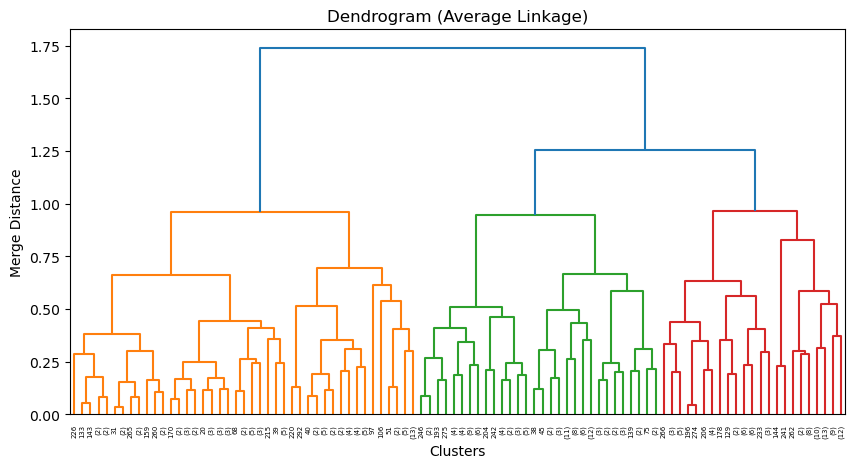

In [37]:
Z = linkage(X, method='average')

plt.figure(figsize=(10, 5))
dendrogram(Z, truncate_mode='level', p=6)
plt.title("Dendrogram (Average Linkage)")
plt.xlabel("Clusters")
plt.ylabel("Merge Distance")
plt.show()


In [38]:
cutoffs = [0.4, 0.5, 0.75, 1.0, 1.5]  # distances chosen from dendrogram
clusterings = {}

for c in cutoffs:
    labels = fcluster(Z, t=c, criterion='distance')
    clusterings[c] = labels

In [39]:
for c, labels in clusterings.items():
    n_clusters = len(np.unique(labels))
    score = silhouette_score(X, labels)
    print(f"Cutoff = {c:.1f} | Clusters = {n_clusters} | Silhouette = {score:.3f}")

Cutoff = 0.4 | Clusters = 28 | Silhouette = 0.339
Cutoff = 0.5 | Clusters = 19 | Silhouette = 0.340
Cutoff = 0.8 | Clusters = 7 | Silhouette = 0.371
Cutoff = 1.0 | Clusters = 3 | Silhouette = 0.378
Cutoff = 1.5 | Clusters = 2 | Silhouette = 0.443


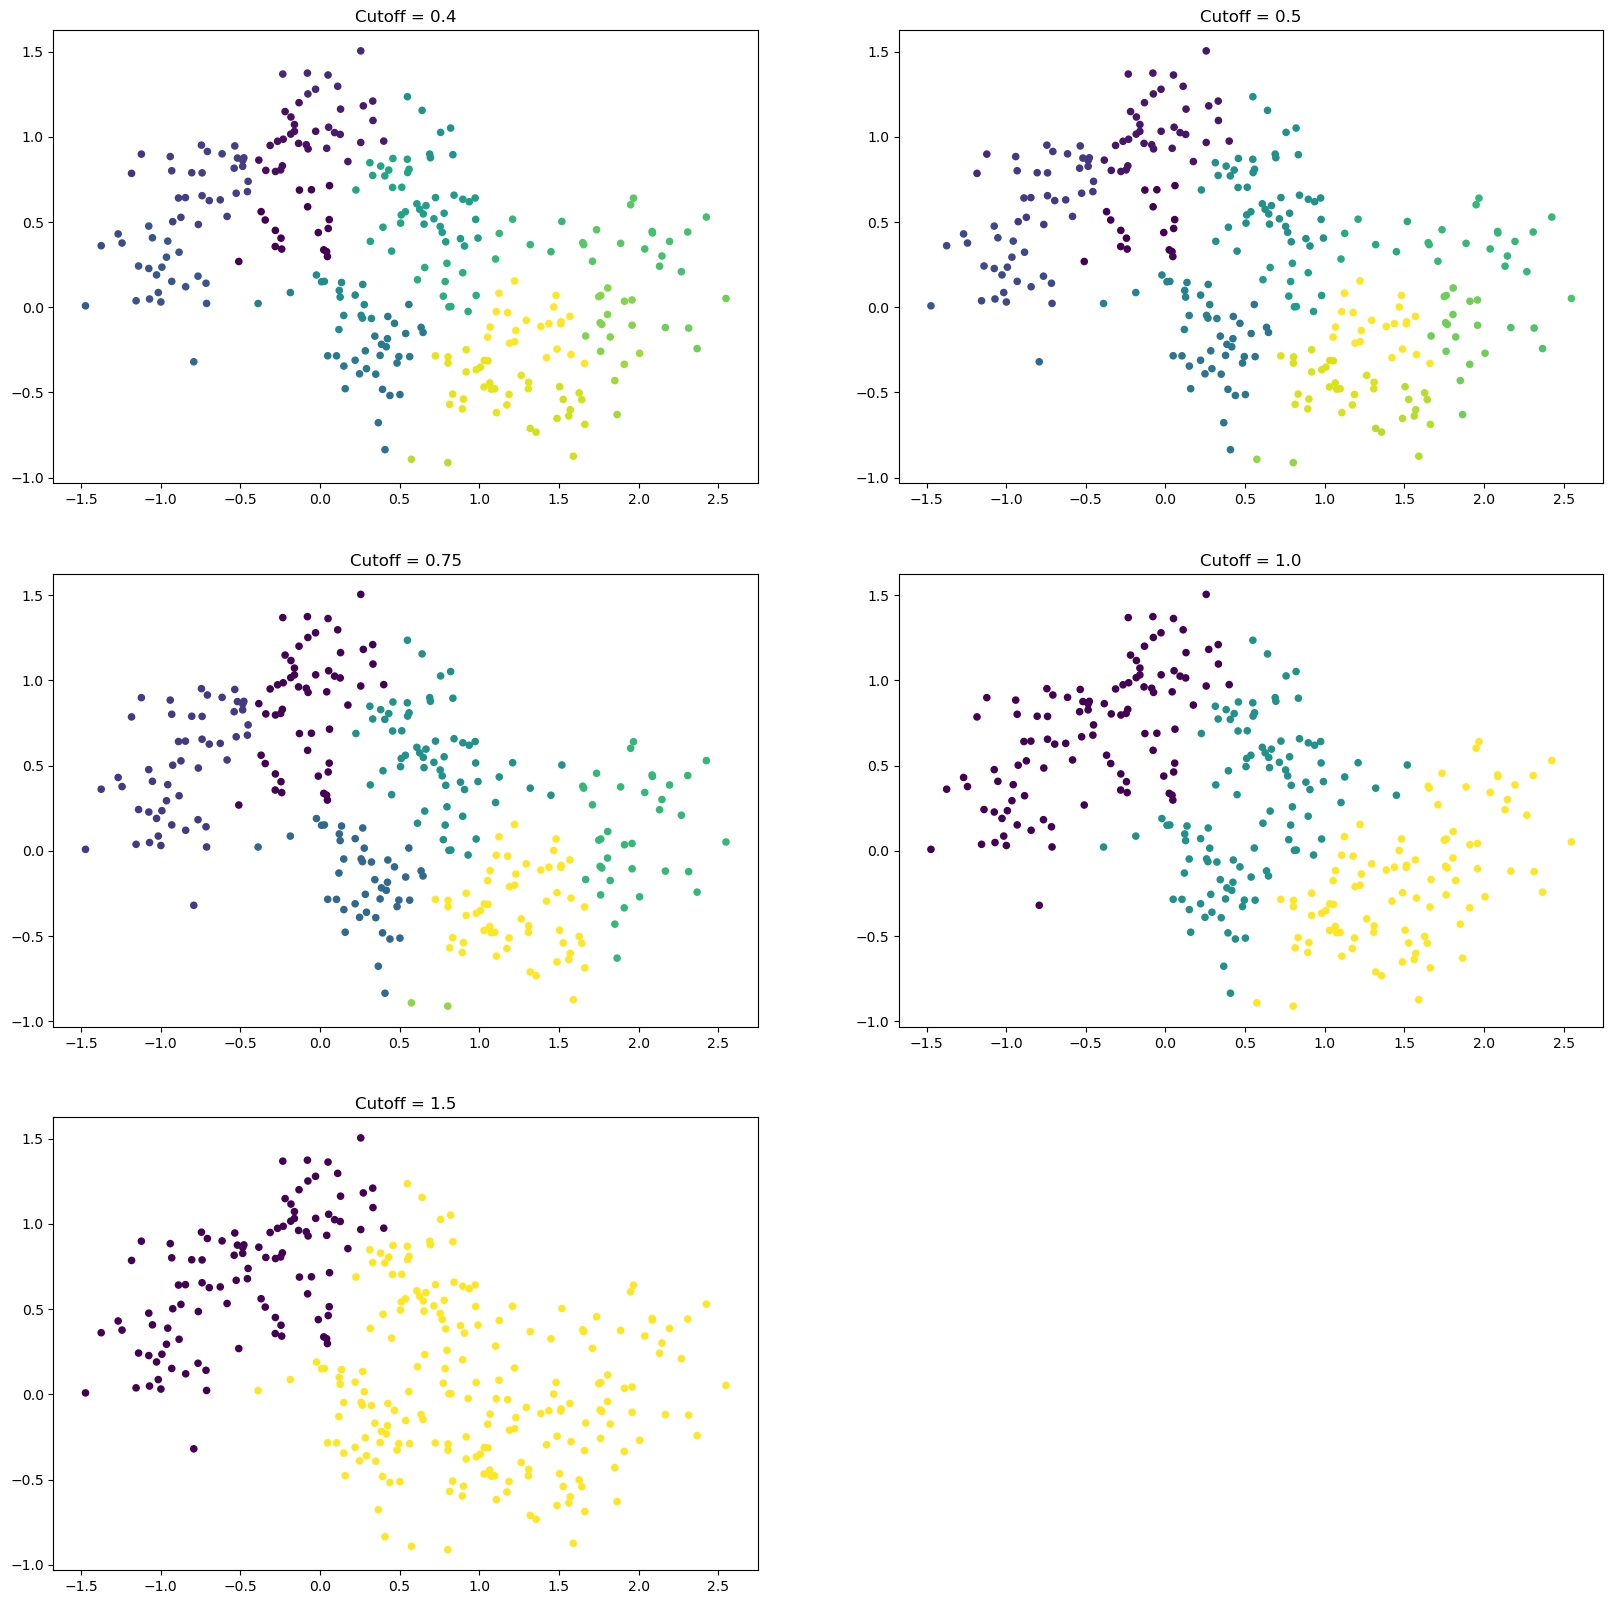

In [40]:
plt.figure(figsize=(20, 20))

for i, (c, labels) in enumerate(clusterings.items(), 1):
    plt.subplot(3, 2, i)
    plt.scatter(X[:, 0], X[:, 1], c=labels, s=20, cmap='viridis')
    plt.title(f"Cutoff = {c}")
    
plt.show()


الگوریتم سلسله مراتبی اینجا طبق امتیاز سیلوئت بهتر عمل کرده است.

دی بی اسکن توانایی شناسایی نویز را دارد سلسله مراتبی نه.



دی بی اسکن برای داده های چگالی محور خوب عمل میکند. مثل کنترل ترافیک.

برای شناسایی علایق کاربران به صورت سلسه مراتبی الگوریتم سلسله مراتبی بهتر عمل میکند. مثل در سطح اول علاقه مندان به فوتبال و در سطح دوم میتوان علاقه مندان به ورزشی را خوشه بندی کرد. و ...


برای شناسایی زمینهای کشاورزی
دی بی اسکن میتواند انواع زمینها را بر اساس چگالی خوشه بندی کند. مثلا زمینهای کشاورزی را از دیگر زمینها یا انواع هر زمین را جدا در نظر بگیرد.

الگوریتم سلسه مراتبی میتواند در یک سطح زمینهای کشاورزی اصلی و فرعی را شناسایی کند و در سطح بالاتر تمام زمینها را

دی بی اسکن نویز را شناسایی میکند و شکل زمینها را به درست کشف کند.

[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]